<a href="https://colab.research.google.com/github/Anthonie-coder/ADS-VC/blob/main/Nba_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [14]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/nba_team_stats_00_to_23.csv")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   teamstatspk               716 non-null    int64  
 1   Team                      716 non-null    object 
 2   games_played              716 non-null    int64  
 3   wins                      716 non-null    int64  
 4   losses                    716 non-null    int64  
 5   win_percentage            716 non-null    float64
 6   Min                       716 non-null    int64  
 7   points                    716 non-null    int64  
 8   field_goals_made          716 non-null    int64  
 9   field_goals_attempted     716 non-null    int64  
 10  field_goal_percentage     716 non-null    float64
 11  three_pointers_made       716 non-null    int64  
 12  three_pointers_attempted  716 non-null    int64  
 13  three_point_percentage    716 non-null    float64
 14  free_throw

In [5]:
df.describe()

,teamstatspk,games_played,wins,losses,win_percentage,Min,points,field_goals_made,field_goals_attempted,field_goal_percentage,...,defensive_rebounds,rebounds,assists,turnovers,steals,blocks,blocks_attempted,personal_fouls,personal_fouls_drawn,plus_minus
count,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,...,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.00000,716.000000
mean,357.500000,80.430168,40.215084,40.215084,0.499784,3888.927374,8230.385475,3062.220670,6716.244413,45.573743,...,2557.713687,3439.062849,1812.224860,1155.023743,609.410615,393.428771,393.428771,1668.815642,1303.78352,0.000000
std,206.835684,4.286506,12.215024,12.133228,0.148919,207.684720,712.154467,251.252302,446.747528,1.686295,...,205.076013,232.258935,209.520421,111.140487,73.742012,67.002488,59.046211,175.680398,674.01655,366.105682
min,0.000000,64.000000,7.000000,9.000000,0.106000,3112.000000,5739.000000,2193.000000,5086.000000,40.800000,...,1879.000000,2560.000000,1224.000000,738.000000,390.000000,195.000000,245.000000,1109.000000,0.00000,-918.000000
25%,178.750000,82.000000,32.000000,31.000000,0.390000,3951.000000,7838.500000,2931.750000,6490.750000,44.400000,...,2439.750000,3325.000000,1680.000000,1086.000000,559.750000,345.000000,352.750000,1562.500000,1331.75000,-248.000000
50%,357.500000,82.000000,41.000000,39.000000,0.512000,3961.000000,8182.500000,3050.500000,6724.000000,45.500000,...,2555.000000,3459.500000,1795.500000,1157.000000,605.000000,388.000000,392.500000,1676.000000,1604.00000,19.000000
75%,536.250000,82.000000,49.000000,49.000000,0.610000,3971.000000,8641.500000,3208.500000,7018.000000,46.700000,...,2701.250000,3585.250000,1933.500000,1224.000000,657.000000,439.250000,431.000000,1786.000000,1708.00000,266.000000
max,715.000000,82.000000,73.000000,72.000000,0.890000,4016.000000,10110.000000,3855.000000,7739.000000,50.700000,...,3316.000000,4078.000000,2522.000000,1514.000000,844.000000,624.000000,565.000000,2189.000000,2104.00000,954.000000


In [7]:
df.head(20)

,teamstatspk,Team,games_played,wins,losses,win_percentage,Min,points,field_goals_made,field_goals_attempted,...,rebounds,assists,turnovers,steals,blocks,blocks_attempted,personal_fouls,personal_fouls_drawn,plus_minus,season
0,0,Boston Celtics,82,64,18,0.780,3966,9887,3601,7396,...,3799,2207,979,557,538,304,1326,1416,930,2023-24
1,1,Denver Nuggets,82,57,25,0.695,3941,9418,3610,7279,...,3643,2415,1036,585,456,394,1489,1467,431,2023-24
2,2,Oklahoma City Thunder,82,57,25,0.695,3961,9847,3653,7324,...,3447,2223,1039,694,538,419,1545,1548,608,2023-24
3,3,Minnesota Timberwolves,82,56,26,0.683,3961,9264,3383,6974,...,3577,2184,1162,647,497,371,1544,1630,529,2023-24
4,4,LA Clippers,82,51,31,0.622,3941,9481,3473,7108,...,3523,2097,1078,640,413,384,1519,1537,269,2023-24
5,5,Dallas Mavericks,82,50,32,0.610,3941,9664,3535,7352,...,3521,2106,1027,563,406,331,1500,1667,181,2023-24
6,6,New York Knicks,82,50,32,0.610,3946,9249,3385,7272,...,3704,1998,1085,612,336,431,1447,1565,376,2023-24
7,7,Milwaukee Bucks,82,49,33,0.598,3961,9756,3538,7258,...,3622,2176,1059,558,413,347,1574,1576,215,2023-24
8,8,New Orleans Pelicans,82,49,33,0.598,3941,9436,3484,7165,...,3605,2210,1067,684,378,424,1508,1506,362,2023-24
9,9,Phoenix Suns,82,49,33,0.598,3956,9532,3482,7063,...,3614,2218,1221,610,492,372,1475,1612,251,2023-24


In [8]:
df.columns

Index(['teamstatspk', 'Team', 'games_played', 'wins', 'losses',
       'win_percentage', 'Min', 'points', 'field_goals_made',
       'field_goals_attempted', 'field_goal_percentage', 'three_pointers_made',
       'three_pointers_attempted', 'three_point_percentage',
       'free_throws_made', 'free_throw_attempted', 'free_throw_percentage',
       'offensive_rebounds', 'defensive_rebounds', 'rebounds', 'assists',
       'turnovers', 'steals', 'blocks', 'blocks_attempted', 'personal_fouls',
       'personal_fouls_drawn', 'plus_minus', 'season'],
      dtype='object')

In [9]:
teams = ['Boston Celtics', 'Golden State Warriors', 'Miami Heat', 'Los Angeles Lakers', 'Oklahoma City Thunder']
df_filtered = df[df['Team'].isin(teams)].copy()

df_filtered['defense_score'] = (
    df_filtered['blocks'] +
    df_filtered['steals'] +
    df_filtered['defensive_rebounds'] -
    df_filtered['personal_fouls']
)

df_filtered['scoring_score'] = (
    df_filtered['points'] +
    df_filtered['assists'] +
    df_filtered['three_pointers_made']+
    df_filtered['free_throws_made']
)

features = df_filtered[['defense_score', 'scoring_score', 'wins']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=2, random_state=42)
df_filtered['cluster'] = kmeans.fit_predict(X_scaled)

cluster_summary = df_filtered.groupby('cluster')[['defense_score', 'scoring_score', 'wins']].mean()
print(cluster_summary)

         defense_score  scoring_score       wins
cluster                                         
0          2150.100000   13076.816667  51.716667
1          1748.326923   11533.500000  35.519231


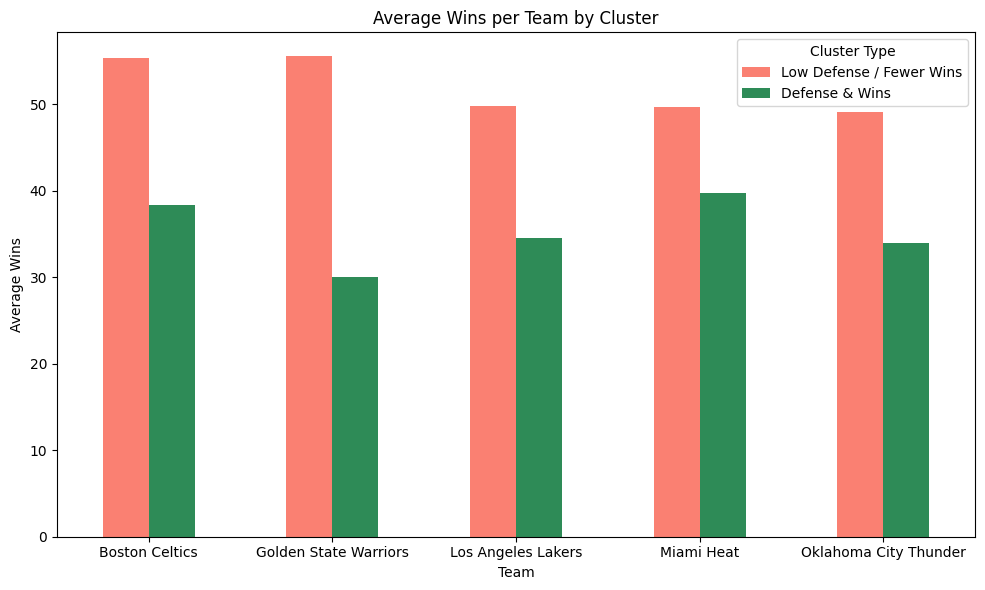

In [11]:
team_summary = df_filtered.groupby(['Team', 'cluster'])['wins'].mean().unstack()

team_summary.columns = ['Low Defense / Fewer Wins', 'Defense & Wins'] if team_summary.columns[0] < team_summary.columns[1] else ['Defense & Wins', 'Low Defense / Fewer Wins']

team_summary.plot(kind='bar', figsize=(10, 6), color=['salmon', 'seagreen'])
plt.title("Average Wins per Team by Cluster")
plt.ylabel("Average Wins")
plt.xticks(rotation=0)
plt.legend(title="Cluster Type")
plt.tight_layout()
plt.show()